The goal of this notebook is to open and look at Trump's tweet data provided by [Harvard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/KJEBIL).

This data set provides data in the **time frame from 04.05.2009 until the 11.07.19**. 

It´s **not the exact time period** I´m looking for, however I first will look at the data.

In [56]:
# import packages we need
import ndjson
import tweepy

In [4]:
# load from file-like objects
with open('realdonaldtrump.ndjson') as f:
    data = ndjson.load(f)

In [41]:
# check data
print("Data type:", type(data))
print("Data length:", len(data))
print("Data in list:", type(data[0]))
print("Keys of dict:\n", data[0].keys())

Data type: <class 'list'>
Data length: 40241
Data in list: <class 'dict'>
Keys of dict:
 dict_keys(['contributors', 'coordinates', 'created_at', 'entities', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place', 'retrieved_utc', 'retweet_count', 'retweeted', 'source', 'text', 'truncated', 'user'])


In [15]:
# check the last 3 tweets of the data set
last3tweets = data[40238:40241]
last3tweets

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Thu Jul 11 15:52:18 +0000 2019',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [{'display_url': 'twitter.com/i/web/status/1…',
     'expanded_url': 'https://twitter.com/i/web/status/1149345680189722630',
     'indices': [116, 139],
     'url': 'https://t.co/Xu0117O2p8'}],
   'user_mentions': []},
  'favorite_count': 8294,
  'favorited': False,
  'geo': None,
  'id': 1149345680189722630,
  'id_str': '1149345680189722630',
  'in_reply_to_screen_name': 'realDonaldTrump',
  'in_reply_to_status_id': 1149345678814060545,
  'in_reply_to_status_id_str': '1149345678814060545',
  'in_reply_to_user_id': 25073877,
  'in_reply_to_user_id_str': '25073877',
  'is_quote_status': False,
  'lang': 'en',
  'place': None,
  'retrieved_utc': 1562866735.0,
  'retweet_count': 2540,
  'retweeted': False,
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  'text': '...The Fake News is n

It looks like this data set does not incluede the whole text of the tweet...

I´m going to check the attritbutes I´m interested in (**in_reply_to_screen_name, created_at,text**)

In [44]:
last3tweets[0]["in_reply_to_screen_name"]

'realDonaldTrump'

In [48]:
# to access several key values, do we have to loop over the keys of the dict element
keys = ["in_reply_to_screen_name", "created_at", "text"]
[last3tweets[0].get(key) for key in keys]

['realDonaldTrump',
 'Thu Jul 11 15:52:18 +0000 2019',
 '...The Fake News is not as important, or as powerful, as Social Media. They have lost tremendous credibility since… https://t.co/Xu0117O2p8']

The three points ..., are a character of the fact that the text is not complete.

Therefore I´m going to check out this specific tweet of Donal Trump.

It´s not possible to look at the timeline for a later post than


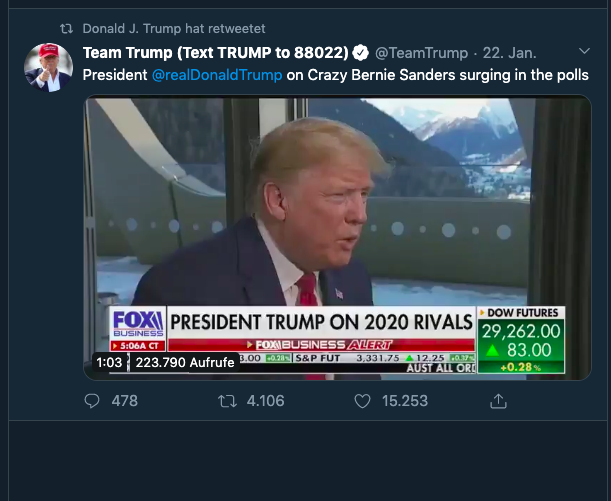

In [55]:
from IPython.display import Image 
print("It´s not possible to look at the timeline for a later post than")
Image("lasttweettrupmstimeline.png")

However, it´s important when using the tweepy api to use the **tweet_mode="extended"** method, otherweise the text of the tweet while gettering the data will not be complete...

I gonna **try** to modify the data with the **.extend()** function

In [58]:
#save most recent tweets
data_fulltext = []
data_fulltext.extend(data)

In [65]:
# check the text of the last tweet
data_fulltext[40240]["text"]

'...or a very nervous and skinny version of Pocahontas (1/1024th), as your President, rather than what you have now,… https://t.co/zAYNhLI8Fi'

Not surprisingly does it not work, the data is saved in the .ndjason without the full text of the tweet, therefore it´s impossible to get the data later on.

**Conclusion:**

**I come to the conclusion that this record cannot be used.
The text does not contain the full length of the tweet and is therefore not suitable for further processing of the classification of the emotions of the text.**